<a href="https://colab.research.google.com/github/Aakash326/ML-models/blob/main/prices_kaggle_comipition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [ ]:
!kaggle competitions download -c home-data-for-ml-course

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [2]:
df=pd.read_csv('/content/train.csv')

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<ipython-input-3-86f0d92bf02a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LotFrontage'])


<Axes: xlabel='LotFrontage', ylabel='Density'>

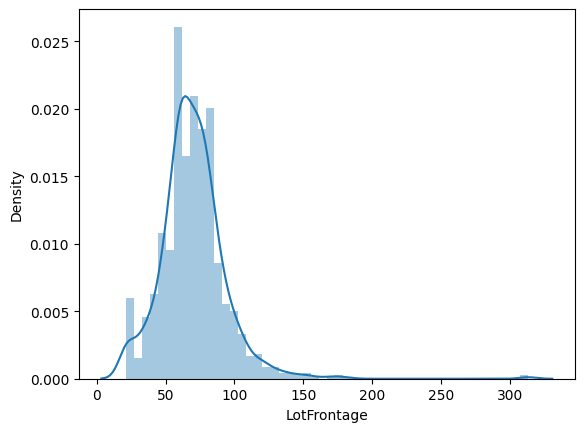

In [3]:
sns.distplot(df['LotFrontage'])

In [ ]:
df['LotFrontage'].skew()  # If skew > 1 or < -1, it's highly skewed → use median


np.float64(2.163569142324884)

In [4]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())

<ipython-input-12-86f0d92bf02a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LotFrontage'])


<Axes: xlabel='LotFrontage', ylabel='Density'>

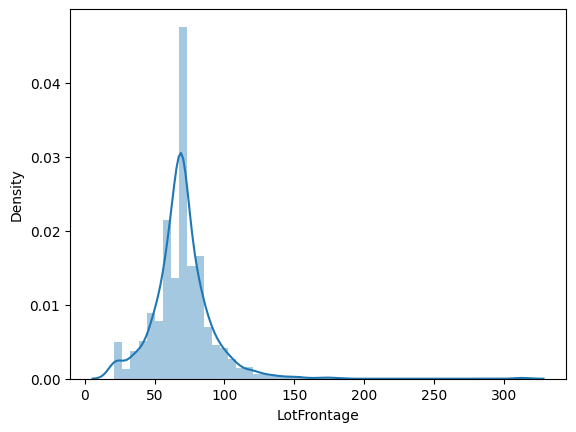

In [ ]:
sns.distplot(df['LotFrontage'])

In [ ]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [5]:
df['PoolQC'].dtype

dtype('O')

In [6]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Get all object (categorical) columns
cat_cols = df_encoded.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype(str)  # ensure no NaNs during encoding
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [ ]:
df_encoded

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      2   
1        2          20         3         80.0     9600       1      2   
2        3          60         3         68.0    11250       1      2   
3        4          70         3         60.0     9550       1      2   
4        5          60         3         84.0    14260       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       1      2   
1456  1457          20         3         85.0    13175       1      2   
1457  1458          70         3         66.0     9042       1      2   
1458  1459          20         3         68.0     9717       1      2   
1459  1460          20         3         75.0     9937       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            3            3          0  ...         0       3      4   
1            3            3          0  ...         0       3      4   
2            0            3          0  ...         0       3      4   
3            0            3          0  ...         0       3      4   
4            0            3          0  ...         0       3      4   
...        ...          ...        ...  ...       ...     ...    ...   
1455         3            3          0  ...         0       3      4   
1456         3            3          0  ...         0       3      2   
1457         3            3          0  ...         0       3      0   
1458         3            3          0  ...         0       3      4   
1459         3            3          0  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               4        0       2    2008         8              4     208500  
1               4        0       5    2007         8              4     181500  
2               4        0       9    2008         8              4     223500  
3               4        0       2    2006         8              0     140000  
4               4        0      12    2008         8              4     250000  
...           ...      ...     ...     ...       ...            ...        ...  
1455            4        0       8    2007         8              4     175000  
1456            4        0       2    2010         8              4     210000  
1457            2     2500       5    2010         8              4     266500  
1458            4        0       4    2010         8              4     142125  
1459            4        0       6    2008         8              4     147500  

[1460 rows x 81 columns]

In [7]:
df_encoded['PoolQC'].dtype

dtype('int64')

<Axes: >

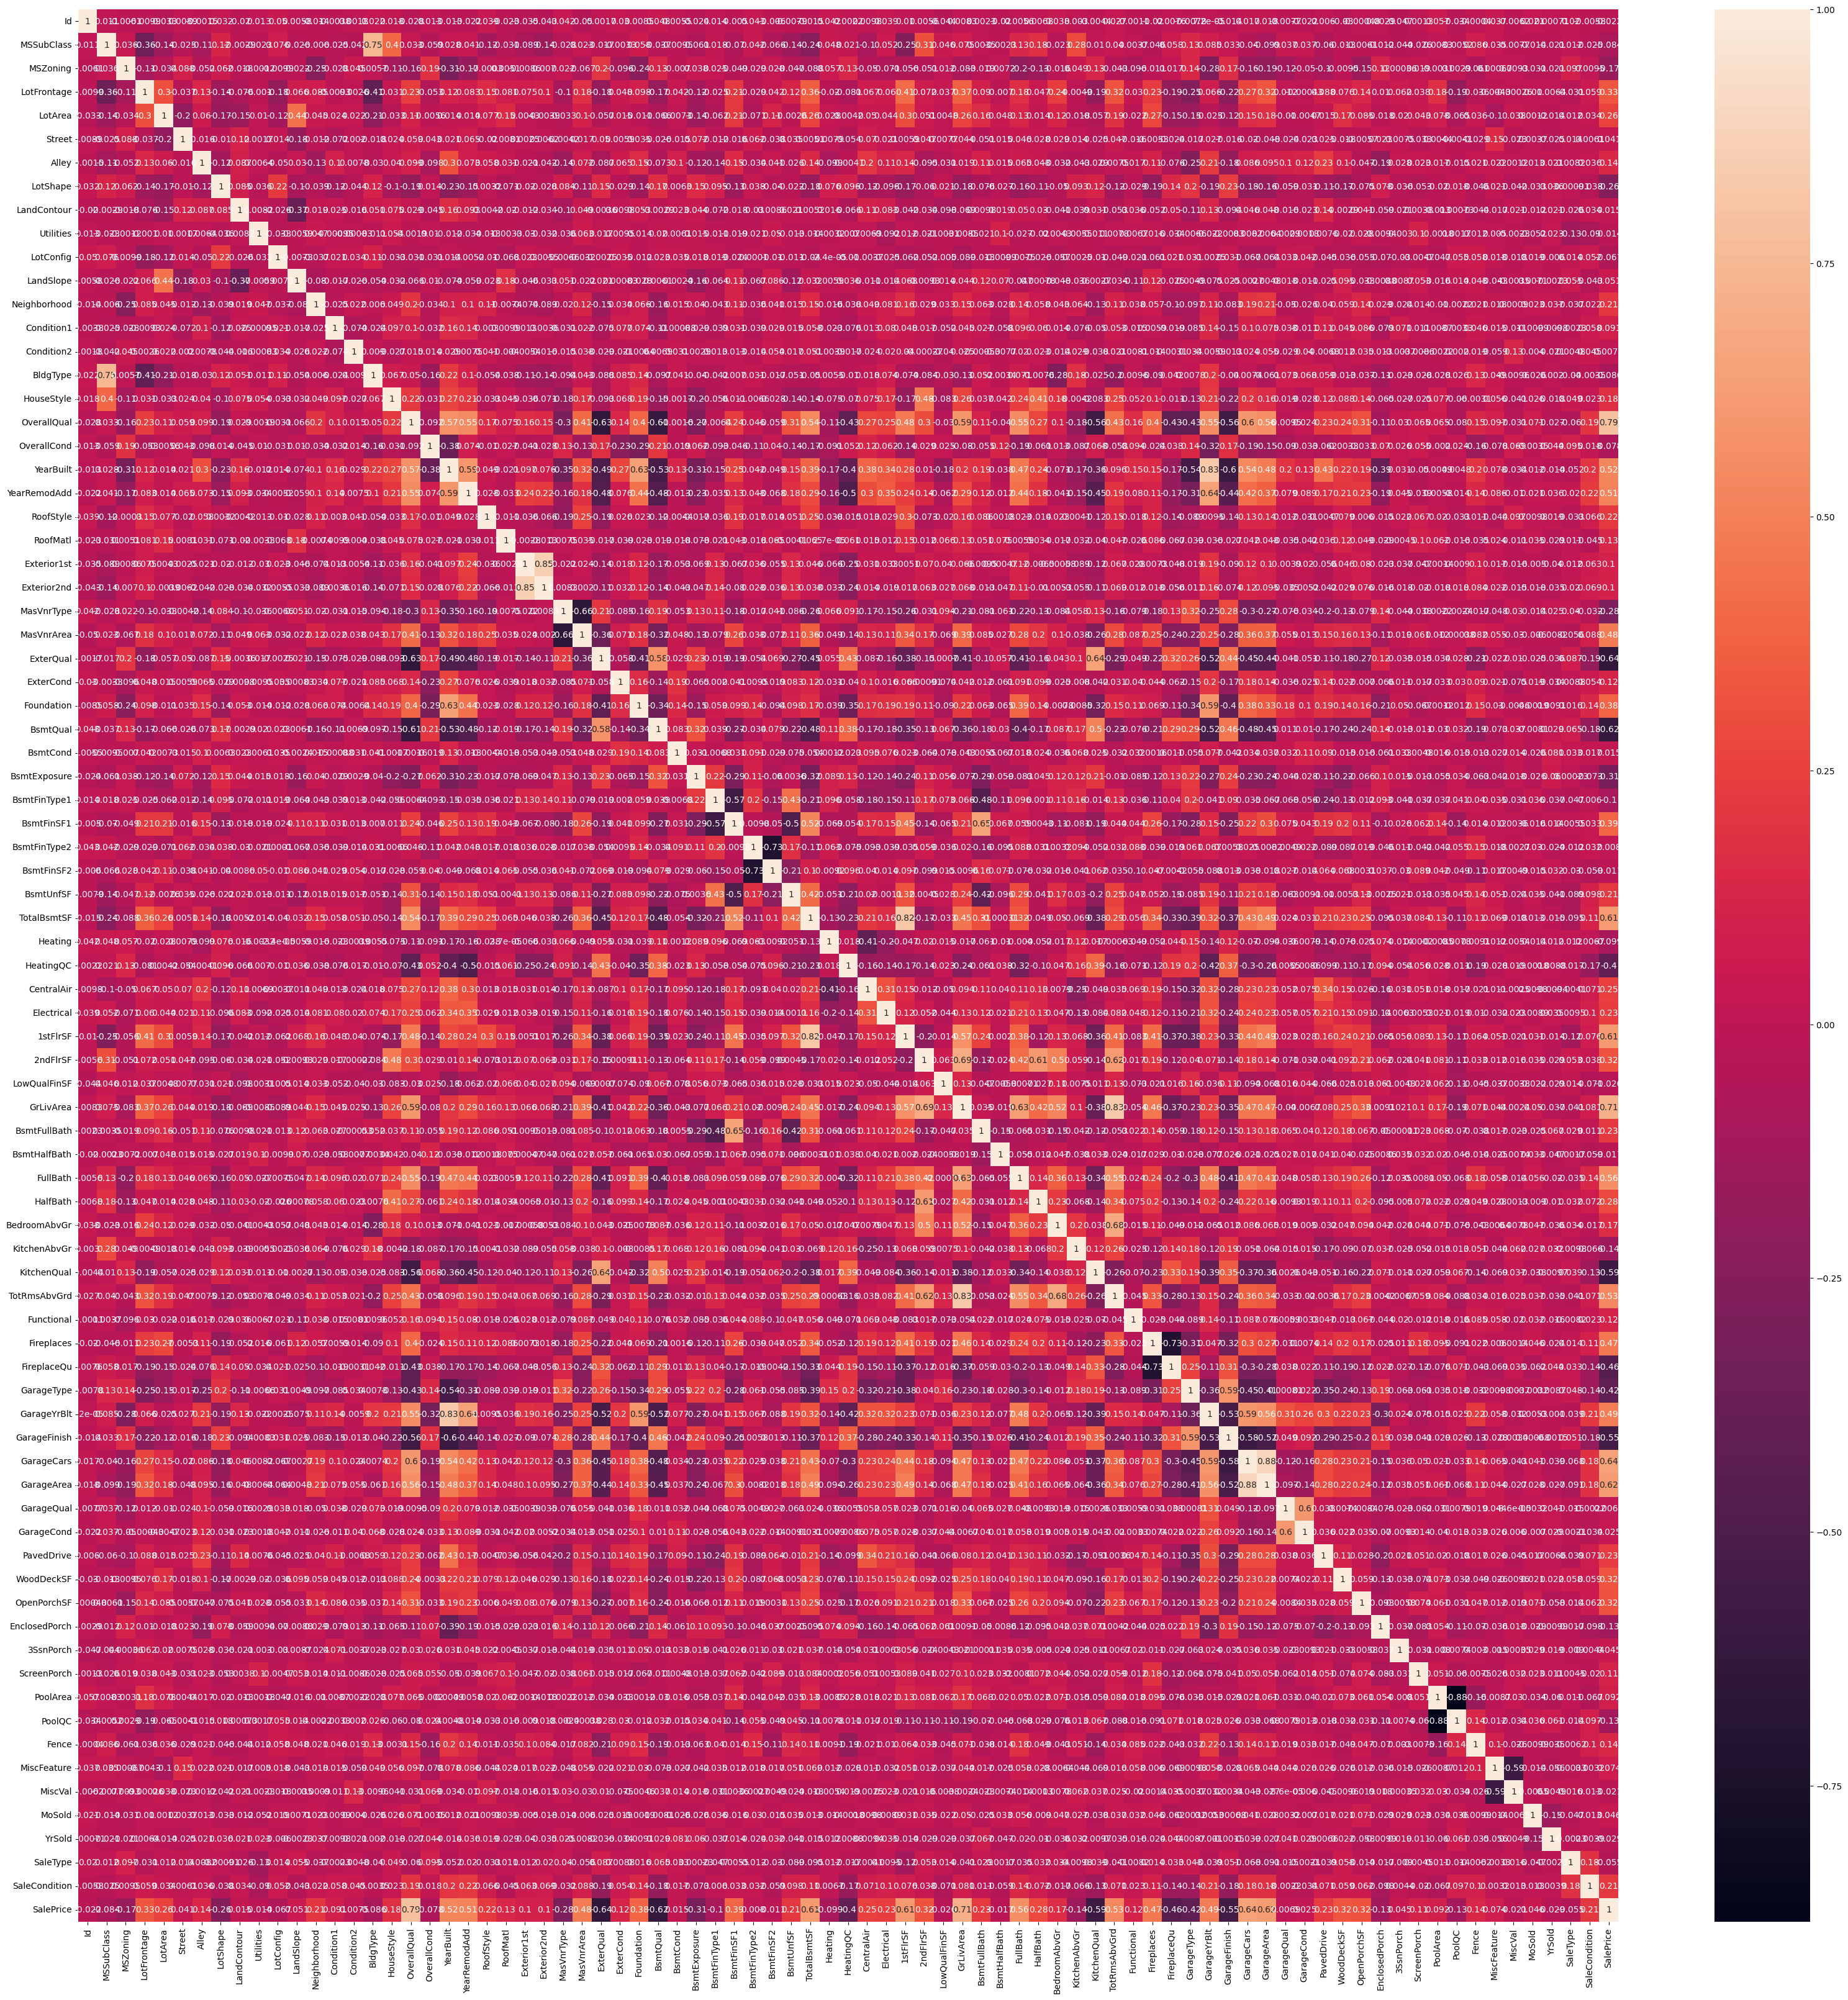

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(df_encoded.corr(),annot=True)

In [ ]:
df_encoded.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156 -0.006096    -0.009921 -0.033226   
MSSubClass     0.011156    1.000000  0.035900    -0.356718 -0.139781   
MSZoning      -0.006096    0.035900  1.000000    -0.105961 -0.034452   
LotFrontage   -0.009921   -0.356718 -0.105961     1.000000  0.304522   
LotArea       -0.033226   -0.139781 -0.034452     0.304522  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.021172   -0.013585 -0.031496     0.010451  0.001205   
YrSold         0.000712   -0.021407 -0.020628     0.006380 -0.014261   
SaleType       0.019773    0.012464  0.097437    -0.031412  0.012292   
SaleCondition -0.005806   -0.024940  0.009494     0.058857  0.034169   
SalePrice     -0.021917   -0.084284 -0.166872     0.334771  0.263843   

                 Street     Alley  LotShape  LandContour  Utilities  ...  \
Id             0.008916 -0.001530  0.032122    -0.019659   0.013324  ...   
MSSubClass    -0.024969 -0.105995  0.119289    -0.002940  -0.022844  ...   
MSZoning       0.087654 -0.052039  0.061887    -0.017854  -0.001192  ...   
LotFrontage   -0.037349  0.132003 -0.138877    -0.076080  -0.001027  ...   
LotArea       -0.197131  0.060105 -0.165315    -0.149083   0.010123  ...   
...                 ...       ...       ...          ...        ...  ...   
MoSold         0.003690  0.013094 -0.033455    -0.011599  -0.051552  ...   
YrSold        -0.025043  0.020944  0.036449     0.020507   0.023353  ...   
SaleType       0.014339  0.008205 -0.000911    -0.025754  -0.126770  ...   
SaleCondition  0.006064  0.035717 -0.038118     0.033809  -0.089701  ...   
SalePrice      0.041036  0.139868 -0.255580     0.015453  -0.014314  ...   

               PoolArea    PoolQC     Fence  MiscFeature   MiscVal    MoSold  \
Id             0.057044 -0.033928 -0.000399     0.037057 -0.006242  0.021172   
MSSubClass     0.008283 -0.005221  0.086360     0.034859 -0.007683 -0.013585   
MSZoning      -0.003128  0.002882 -0.061289     0.000673  0.009293 -0.031496   
LotFrontage    0.180819 -0.191902 -0.036421    -0.004266 -0.000255  0.010451   
LotArea        0.077672 -0.065167  0.036031    -0.103544  0.038068  0.001205   
...                 ...       ...       ...          ...       ...       ...   
MoSold        -0.033737  0.036368 -0.009892    -0.014193 -0.006495  1.000000   
YrSold        -0.059689  0.060904 -0.035366    -0.055962  0.004906 -0.145721   
SaleType       0.011009 -0.013592 -0.006154    -0.003311  0.015773 -0.047386   
SaleCondition -0.067251  0.097425  0.100675     0.003192  0.013027  0.013320   
SalePrice      0.092404 -0.126070  0.140640     0.073609 -0.021190  0.046432   

                 YrSold  SaleType  SaleCondition  SalePrice  
Id             0.000712  0.019773      -0.005806  -0.021917  
MSSubClass    -0.021407  0.012464      -0.024940  -0.084284  
MSZoning      -0.020628  0.097437       0.009494  -0.166872  
LotFrontage    0.006380 -0.031412       0.058857   0.334771  
LotArea       -0.014261  0.012292       0.034169   0.263843  
...                 ...       ...            ...        ...  
MoSold        -0.145721 -0.047386       0.013320   0.046432  
YrSold         1.000000 -0.002327       0.003880  -0.028923  
SaleType      -0.002327  1.000000       0.184067  -0.054911  
SaleCondition  0.003880  0.184067       1.000000   0.213092  
SalePrice     -0.028923 -0.054911       0.213092   1.000000  

[81 rows x 81 columns]

In [8]:
corr_with_target = df_encoded.corr()['SalePrice'].abs()

In [ ]:
corr_with_target

Id               0.021917
MSSubClass       0.084284
MSZoning         0.166872
LotFrontage      0.334771
LotArea          0.263843
                   ...   
MoSold           0.046432
YrSold           0.028923
SaleType         0.054911
SaleCondition    0.213092
SalePrice        1.000000
Name: SalePrice, Length: 81, dtype: float64

In [9]:
features_to_keep = corr_with_target[corr_with_target >= 0.2].index.drop('SalePrice')

# Create new dataframe with only those features + target
filtered_df = df[features_to_keep.tolist() + ['SalePrice']]

print(filtered_df)

      LotFrontage  LotArea LotShape Neighborhood  OverallQual  YearBuilt  \
0            65.0     8450      Reg      CollgCr            7       2003   
1            80.0     9600      Reg      Veenker            6       1976   
2            68.0    11250      IR1      CollgCr            7       2001   
3            60.0     9550      IR1      Crawfor            7       1915   
4            84.0    14260      IR1      NoRidge            8       2000   
...           ...      ...      ...          ...          ...        ...   
1455         62.0     7917      Reg      Gilbert            6       1999   
1456         85.0    13175      Reg       NWAmes            6       1978   
1457         66.0     9042      Reg      Crawfor            7       1941   
1458         68.0     9717      Reg        NAmes            5       1950   
1459         75.0     9937      Reg      Edwards            5       1965   

      YearRemodAdd RoofStyle MasVnrType  MasVnrArea  ... GarageType  \
0             20

In [ ]:
df_encoded=filtered_df

In [10]:
x=df_encoded.drop('SalePrice',axis=1)
y=df_encoded['SalePrice']

In [ ]:
for col in x.columns:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    x[col] = np.where(x[col] < lower, lower,
                      np.where(x[col] > upper, upper, x[col]))

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [69]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

In [34]:
xg=XGBRegressor()
xg.fit(x_train_norm,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
y_pred=xg.predict(x_test_norm)
r2_score(y_test,y_pred)

708080896.0

In [53]:
param_dist = {
    'n_estimators': [50,75,100,150],          # More trees
    'max_depth': [6, 8, 10],             # Deeper trees
    'learning_rate': [0.01, 0.05],       # Slower learning
    'subsample': [0.8, 0.9],             # Stochasticity
    'colsample_bytree': [0.7, 0.8],      # Feature subsampling
    'gamma': [0, 0.1, 0.2],              # Regularization
    'reg_alpha': [0, 0.1, 0.5],          # L1 regularization
    'reg_lambda': [1, 1.5, 2]            # L2 regularization
}

In [54]:

random_search = RandomizedSearchCV(
    estimator=xg,
    param_distributions=param_dist,
    n_iter=30,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [55]:
random_search.fit(x_train_norm, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05],
                                        'max_depth': [6, 8, 10],
                                        'n_estimators': [50, 75, 100, 150],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.8, 0.9]},
                   random_state=42, scoring='r2', verbose=2)

In [58]:
best_xgb=random_search.best_estimator_

In [59]:
y_pred1=best_xgb.predict(x_test_norm)
r2_score(y_test,y_pred1)

0.9164024591445923

In [70]:
mean_absolute_error(y_test,y_pred1)

15619.623046875

In [71]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))


In [72]:
rmsle

np.float64(0.14961896198322544)

In [12]:
test_df = pd.read_csv('/content/test.csv')

In [13]:
test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [15]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [17]:
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].median())

In [39]:
cat_cols_test = df_encoded_test.select_dtypes(include=['object']).columns


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_cols = df_encoded_test.select_dtypes(include=['object']).columns.tolist()

ct = ColumnTransformer([
    ("encoder", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
], remainder='passthrough')

In [62]:
# Match columns between train and test
final_test = df_encoded_test[x_train.columns]

# Fill missing columns with 0 if needed
for col in x_train.columns:
    if col not in final_test.columns:
        final_test[col] = 0

# Ensure correct order
final_test = final_test[x_train.columns]

# Scale and predict
final_test_norm = scaler.transform(final_test)
predictions = best_xgb.predict(final_test_norm)


In [65]:
sub=pd.read_csv('/content/submission.csv')

In [66]:
sub

Id   SalePrice
0     1461  124914.090
1     1462  155647.890
2     1463  178405.530
3     1464  184523.310
4     1465  195099.840
...    ...         ...
1454  2915   82845.500
1455  2916   86755.490
1456  2917  160523.520
1457  2918  116247.055
1458  2919  219103.690

[1459 rows x 2 columns]

In [63]:
submission = pd.DataFrame({
    "Id": test_df["Id"],              # Use original IDs
    "SalePrice": predictions          # Your model's predictions
})

submission.to_csv("submission.csv1", index=False)
print("✅ Submission file created: submission.csv")


✅ Submission file created: submission.csv
